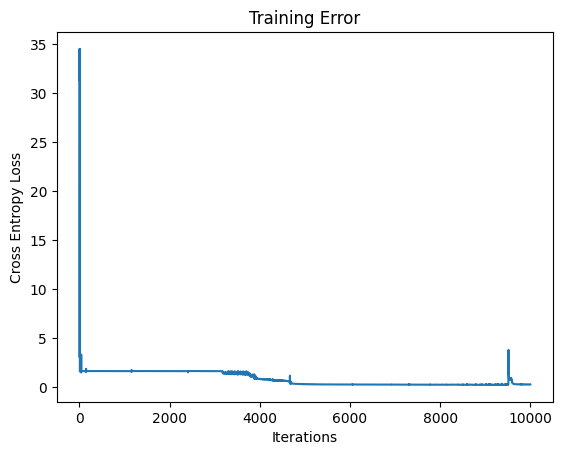


Evaluation Metrics:

Accuracy: 0.87

Precision: [0.94444444 1.         0.95238095 0.94736842 0.61538462]

Recall: [0.85       0.8        0.95238095 0.85714286 0.88888889]

F1-score: [0.89473684 0.88888889 0.95238095 0.9        0.72727273]


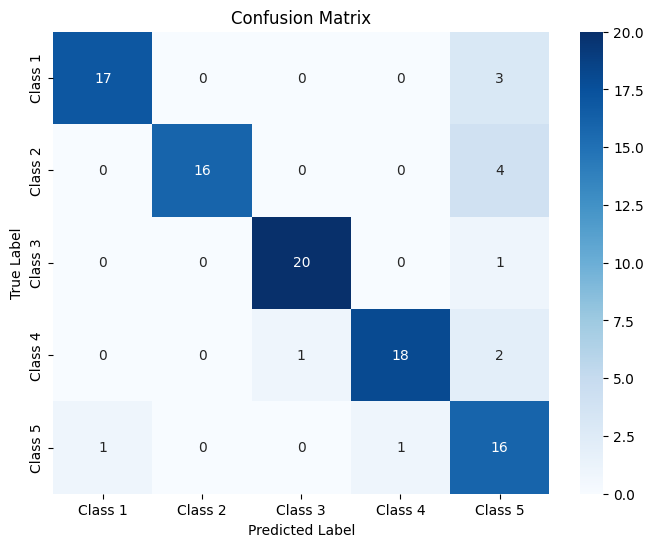

In [5]:
# Instruction to execute: need to install the necessary libraries- numpy, matplotlib, sklearn and seaborn, then just hit the run button.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

class NeuralNetwork(object):
    def __init__(self):
        # Defining the architecture of the neural network
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 10
        hiddenLayer3Neurons = 10
        outLayerNeurons = 5  # Number of classes
        
        # Initializing the learning rate
        self.learning_rate = 0.2
        
        # Initializing weights with random values
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_OH = np.random.randn(hiddenLayer3Neurons, outLayerNeurons)
        
    def softmax(self, x):
        # Softmax activation function to obtain class probabilities
        exp_vals = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)
    
    def cross_entropy_loss(self, Y, pred):
        # Cross-entropy loss function to measure the difference between predicted and true class probabilities
        m = Y.shape[0]
        loss = -1/m * np.sum(Y * np.log(pred))
        return loss
    
    def sigmoid(self, x, der=False):
        # Sigmoid activation function for hidden layers
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def feedForward(self, X):
        # Feedforward propagation through the network
        # Calculating activations of hidden layers
        hidden_input1 = np.dot(X, self.W_H1)
        self.hidden_output1 = self.sigmoid(hidden_input1)
        
        hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.sigmoid(hidden_input2)
        
        hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
        self.hidden_output3 = self.sigmoid(hidden_input3)
        
        # Calculating activations of output layer
        output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.softmax(output_input)
        return pred
    
    def backPropagation(self, X, Y, pred):
        # Back propagation to update weights based on prediction error
        output_error = Y - pred
        output_delta = self.learning_rate * output_error
        
        hidden_error3 = output_delta.dot(self.W_OH.T) * self.sigmoid(self.hidden_output3, der=True)
        hidden_delta3 = self.learning_rate * hidden_error3
        
        hidden_error2 = hidden_delta3.dot(self.W_H3.T) * self.sigmoid(self.hidden_output2, der=True)
        hidden_delta2 = self.learning_rate * hidden_error2
        
        hidden_error1 = hidden_delta2.dot(self.W_H2.T) * self.sigmoid(self.hidden_output1, der=True)
        hidden_delta1 = self.learning_rate * hidden_error1
        
        # Updating weights
        self.W_H1 += X.T.dot(hidden_delta1)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_OH += self.hidden_output3.T.dot(output_delta)
        
    def train(self, X, Y, epochs=10000):
        # Training the neural network
        err = []
        for i in range(epochs):
            output = self.feedForward(X)
            # Calculating and storing the training error for each epoch
            err.append(self.cross_entropy_loss(Y, output))
            self.backPropagation(X, Y, output)
        return err

# Generating synthetic dataset
np.random.seed(0)

# Number of samples per class
num_samples_per_class = 100

# Generating input features
X = np.zeros((num_samples_per_class * 5, 2))
Y = np.zeros((num_samples_per_class * 5, 5))

# Class 1
X[:num_samples_per_class, :] = np.random.randn(num_samples_per_class, 2) + np.array([2, 2])
Y[:num_samples_per_class, 0] = 1

# Class 2
X[num_samples_per_class:2*num_samples_per_class, :] = np.random.randn(num_samples_per_class, 2) + np.array([2, -2])
Y[num_samples_per_class:2*num_samples_per_class, 1] = 1

# Class 3
X[2*num_samples_per_class:3*num_samples_per_class, :] = np.random.randn(num_samples_per_class, 2) + np.array([-2, 2])
Y[2*num_samples_per_class:3*num_samples_per_class, 2] = 1

# Class 4
X[3*num_samples_per_class:4*num_samples_per_class, :] = np.random.randn(num_samples_per_class, 2) + np.array([-2, -2])
Y[3*num_samples_per_class:4*num_samples_per_class, 3] = 1

# Class 5
X[4*num_samples_per_class:, :] = np.random.randn(num_samples_per_class, 2)
Y[4*num_samples_per_class:, 4] = 1

# Shuffling the dataset
permutation = np.random.permutation(X.shape[0])
X = X[permutation, :]
Y = Y[permutation, :]

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing the neural network
NN = NeuralNetwork()

# Training the neural network
training_error = NN.train(X_train, Y_train)

# Plotting the training error
plt.plot(training_error)
plt.title('Training Error')
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss')
plt.savefig("NN-HW/training_error.jpg")
plt.show()

# Testing the neural network with testing data
predictions = NN.feedForward(X_test)

# Converting predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Y_test, axis=1)

# Calculating evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f1 = f1_score(true_labels, predicted_labels, average=None)

# Printing evaluation metrics
print()
print("Evaluation Metrics:")
print()
print("Accuracy:", accuracy)
print()
print("Precision:", precision)
print()
print("Recall:", recall)
print()
print("F1-score:", f1)

# Plotting confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("NN-HW/confusion_matrix.jpg")
plt.show()